In [2]:
!pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


You should consider upgrading via the 'C:\projects_ml\IOPA X-RAYS\ana_env\Scripts\python.exe -m pip install --upgrade pip' command.


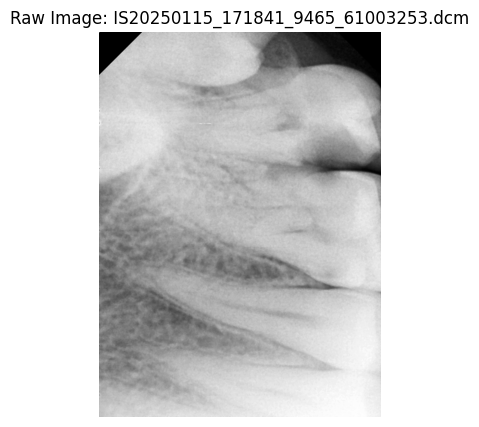

Processed IS20250115_171841_9465_61003253.dcm - Dimensions: 1095x800


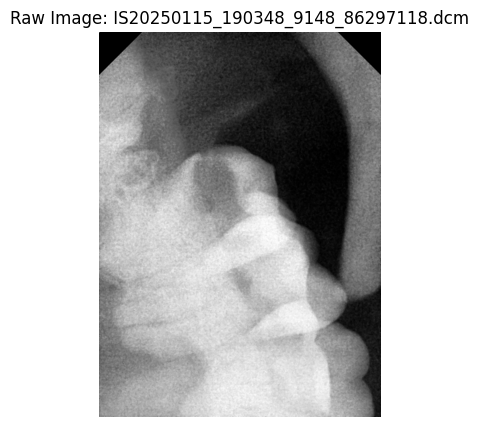

Processed IS20250115_190348_9148_86297118.dcm - Dimensions: 1095x800


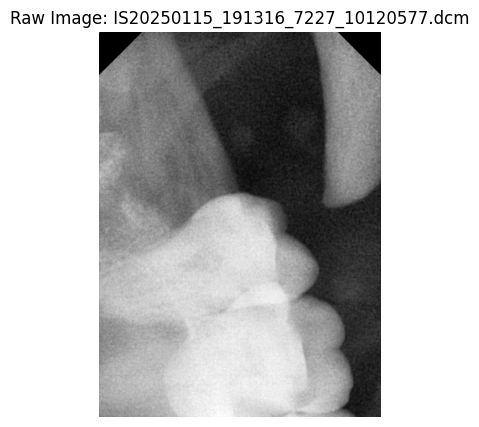

Processed IS20250115_191316_7227_10120577.dcm - Dimensions: 1095x800


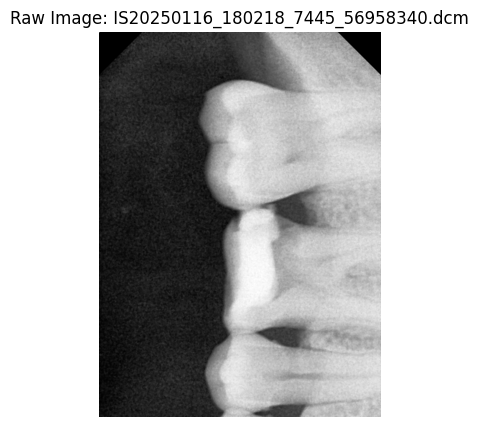

Processed IS20250116_180218_7445_56958340.dcm - Dimensions: 1095x800


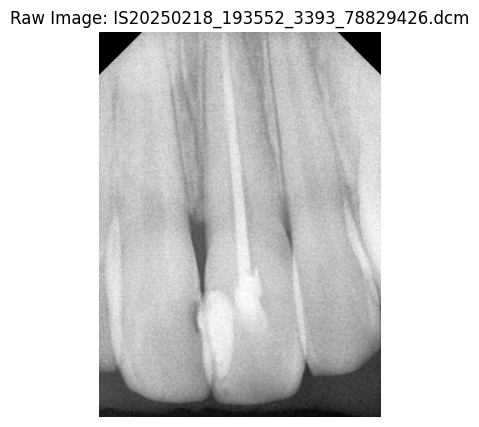

Processed IS20250218_193552_3393_78829426.dcm - Dimensions: 1095x800


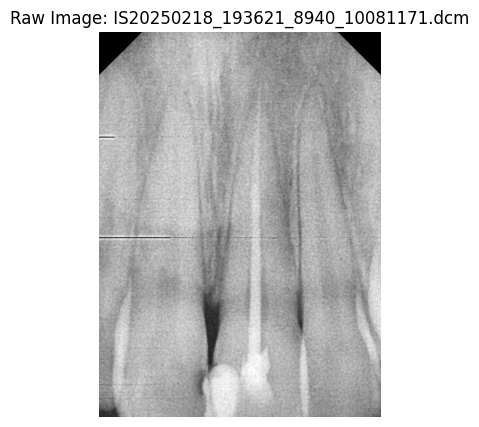

Processed IS20250218_193621_8940_10081171.dcm - Dimensions: 1095x800


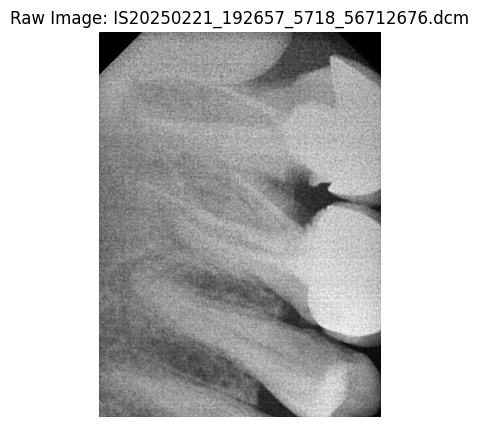

Processed IS20250221_192657_5718_56712676.dcm - Dimensions: 1095x800
Metadata saved to dicom_metadata.csv
                              Filename Modality  Rows  Columns  WindowCenter  \
0  IS20250115_171841_9465_61003253.dcm       IO  1095      800         127.0   
1  IS20250115_190348_9148_86297118.dcm       IO  1095      800         127.0   
2  IS20250115_191316_7227_10120577.dcm       IO  1095      800         127.0   
3  IS20250116_180218_7445_56958340.dcm       IO  1095      800         127.0   
4  IS20250218_193552_3393_78829426.dcm       IO  1095      800         127.0   
5  IS20250218_193621_8940_10081171.dcm       IO  1095      800         127.0   
6  IS20250221_192657_5718_56712676.dcm       IO  1095      800         127.0   

   WindowWidth  
0        255.0  
1        255.0  
2        255.0  
3        255.0  
4        255.0  
5        255.0  
6        255.0  


In [1]:
import os
import numpy as np
import pydicom
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from skimage.feature import canny
from skimage import filters

root= os.path.dirname(os.getcwd())
# Directory containing DICOM and RVG files
data_dir = os.path.join(root, 'data')

# Task 1: DICOM File Handling
# Function to extract metadata and pixel data
def extract_metadata_and_image(file_path):
    try:
        ds = pydicom.dcmread(file_path)
        # Extract relevant metadata
        metadata = {
            'Filename': os.path.basename(file_path),
            'PatientID': ds.get('Anonymised', 'Unknown'),
            'PatientSex': ds.get('PatientSex', 'Unknown'),
            'PatientAge': ds.get('PatientAge', 'Unknown'),
            'Modality': ds.get('Modality', 'Unknown'),
            'Rows': ds.get('Rows', 0),
            'Columns': ds.get('Columns', 0),
            'PixelSpacing': ds.get('PixelSpacing', [0, 0]),
            'WindowCenter': ds.get('WindowCenter', 127),
            'WindowWidth': ds.get('WindowWidth', 255),
            'RescaleIntercept': ds.get('RescaleIntercept', 0),
            'RescaleSlope': ds.get('RescaleSlope', 1),
            'PhotometricInterpretation': ds.get('PhotometricInterpretation', 'MONOCHROME2')
        }
        # Extract and preprocess pixel data
        image = ds.pixel_array.astype(np.float32)
        # Apply rescale slope and intercept
        image = image * metadata['RescaleSlope'] + metadata['RescaleIntercept']
        # Apply windowing
        window_min = metadata['WindowCenter'] - metadata['WindowWidth'] / 2
        window_max = metadata['WindowCenter'] + metadata['WindowWidth'] / 2
        image = np.clip(image, window_min, window_max)
        # Normalize to [0, 1]
        image = (image - window_min) / (window_max - window_min)
        # Handle photometric interpretation
        if metadata['PhotometricInterpretation'] == 'MONOCHROME1':
            image = 1 - image  # Invert for MONOCHROME1
        return metadata, image
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None

# Collect metadata and images from all files
all_files = []

try:
    for filename in os.listdir(data_dir):
        if filename.endswith('.dcm'):
            full_path = os.path.join(data_dir, filename)
            if os.path.isfile(full_path):  # Ensure it's a file
                all_files.append(full_path)
except FileNotFoundError:
    print(f"Directory '{data_dir}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

    
metadata_list = []
images = []
for file_path in all_files:
    metadata, image = extract_metadata_and_image(file_path)
    if metadata and image is not None:
        metadata_list.append(metadata)
        images.append(image)
        # Visualize raw image
        plt.figure(figsize=(5, 5))
        plt.title(f"Raw Image: {metadata['Filename']}")
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()
        print(f"Processed {metadata['Filename']} - Dimensions: {metadata['Rows']}x{metadata['Columns']}")

# Save metadata to CSV
metadata_df = pd.DataFrame(metadata_list)
metadata_df.to_csv('dicom_metadata.csv', index=False)
print("Metadata saved to dicom_metadata.csv")
print(metadata_df[['Filename', 'Modality', 'Rows', 'Columns', 'WindowCenter', 'WindowWidth']])


Metrics for IS20250115_171841_9465_61003253.dcm: {'Brightness': np.float64(0.6869815874294927), 'Contrast': np.float64(0.19278367413150277), 'Sharpness': np.float64(82.741920481094), 'Noise': np.float64(0.10082181410702797), 'Filename': 'IS20250115_171841_9465_61003253.dcm'}


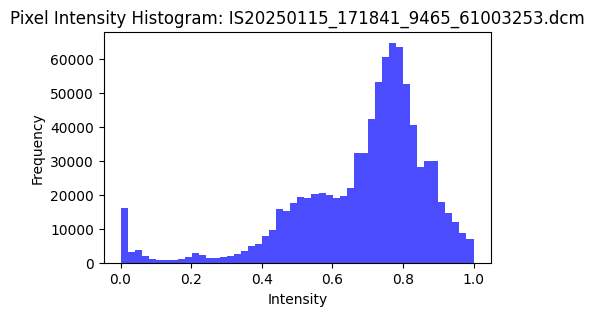

Metrics for IS20250115_190348_9148_86297118.dcm: {'Brightness': np.float64(0.5150665323663712), 'Contrast': np.float64(0.3009119041352232), 'Sharpness': np.float64(116.69788312345442), 'Noise': np.float64(0.3017414469357598), 'Filename': 'IS20250115_190348_9148_86297118.dcm'}


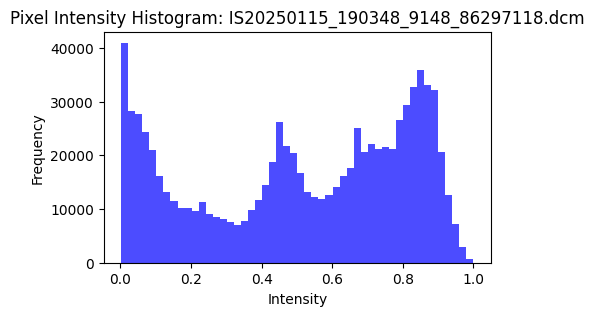

Metrics for IS20250115_191316_7227_10120577.dcm: {'Brightness': np.float64(0.5030450555107887), 'Contrast': np.float64(0.28353279412231364), 'Sharpness': np.float64(101.51437962794768), 'Noise': np.float64(0.303279999753845), 'Filename': 'IS20250115_191316_7227_10120577.dcm'}


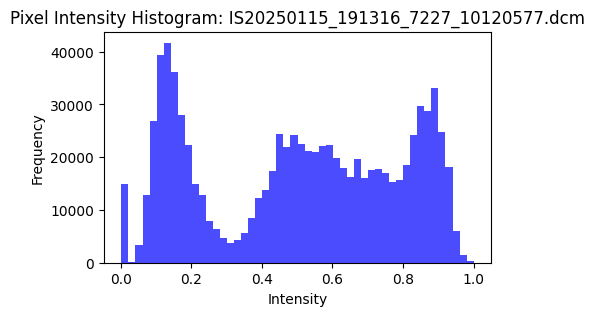

Metrics for IS20250116_180218_7445_56958340.dcm: {'Brightness': np.float64(0.4582496261975109), 'Contrast': np.float64(0.32773139353841446), 'Sharpness': np.float64(89.4367351560174), 'Noise': np.float64(0.33457342796901834), 'Filename': 'IS20250116_180218_7445_56958340.dcm'}


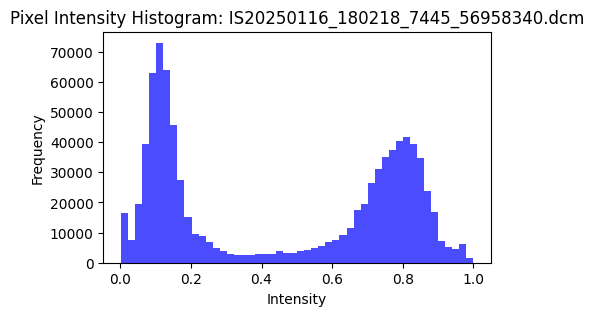

Metrics for IS20250218_193552_3393_78829426.dcm: {'Brightness': np.float64(0.6899376242277732), 'Contrast': np.float64(0.19675875795897296), 'Sharpness': np.float64(175.69812036146033), 'Noise': np.float64(0.114765966615783), 'Filename': 'IS20250218_193552_3393_78829426.dcm'}


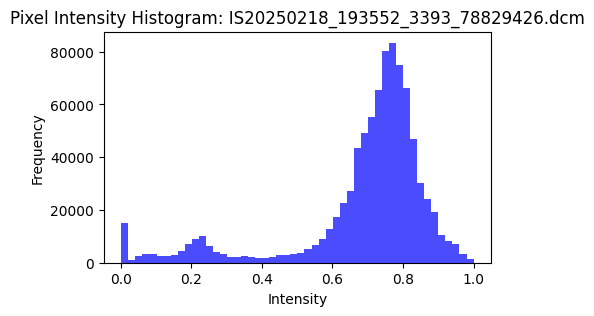

Metrics for IS20250218_193621_8940_10081171.dcm: {'Brightness': np.float64(0.6564579953442565), 'Contrast': np.float64(0.1350118631505305), 'Sharpness': np.float64(236.9231397100756), 'Noise': np.float64(0.11331651450827399), 'Filename': 'IS20250218_193621_8940_10081171.dcm'}


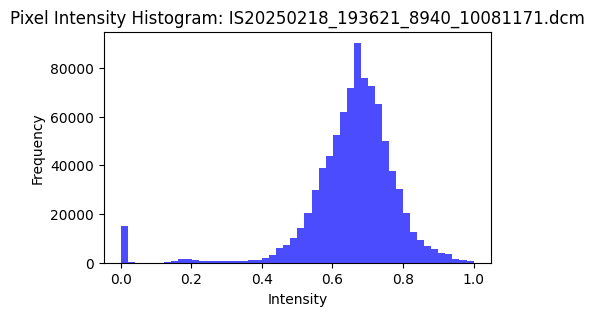

Metrics for IS20250221_192657_5718_56712676.dcm: {'Brightness': np.float64(0.5596067955949504), 'Contrast': np.float64(0.17236239615385207), 'Sharpness': np.float64(373.5171666776705), 'Noise': np.float64(0.12749850306145558), 'Filename': 'IS20250221_192657_5718_56712676.dcm'}


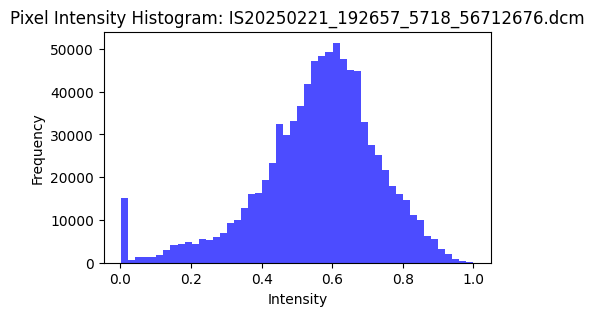

Image metrics saved to image_metrics.csv


In [2]:
# Task 2: Initial Image Analysis & Characterization
def compute_image_metrics(image):
    # Brightness: Mean pixel intensity
    brightness = np.mean(image)
    # Contrast: Standard deviation of pixel intensities
    contrast = np.std(image)
    # Sharpness: Laplacian variance
    laplacian = cv2.Laplacian((image * 255).astype(np.uint8), cv2.CV_64F)
    sharpness = laplacian.var()
    # Noise: Standard deviation in a flat region (approximated as image center 100x100 patch)
    center = image[image.shape[0]//4:image.shape[0]*3//4, image.shape[1]//4:image.shape[1]*3//4]
    noise = np.std(center)
    return {'Brightness': brightness, 'Contrast': contrast, 'Sharpness': sharpness, 'Noise': noise}

# Compute and visualize metrics
metrics_list = []
for i, image in enumerate(images):
    metrics = compute_image_metrics(image)
    metrics['Filename'] = metadata_list[i]['Filename']
    metrics_list.append(metrics)
    print(f"Metrics for {metrics['Filename']}: {metrics}")
    # Visualize histogram
    plt.figure(figsize=(5, 3))
    plt.hist(image.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title(f"Pixel Intensity Histogram: {metrics['Filename']}")
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Save metrics to CSV
metrics_df = pd.DataFrame(metrics_list)
metrics_df.to_csv('image_metrics.csv', index=False)
print("Image metrics saved to image_metrics.csv")

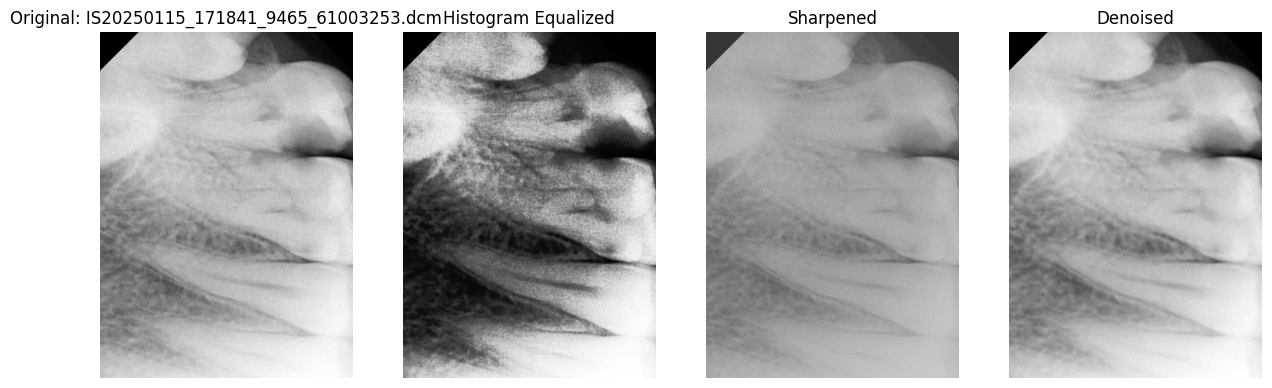

Static preprocessing applied to IS20250115_171841_9465_61003253.dcm. Issues: Fixed parameters may over-enhance or under-denoise.


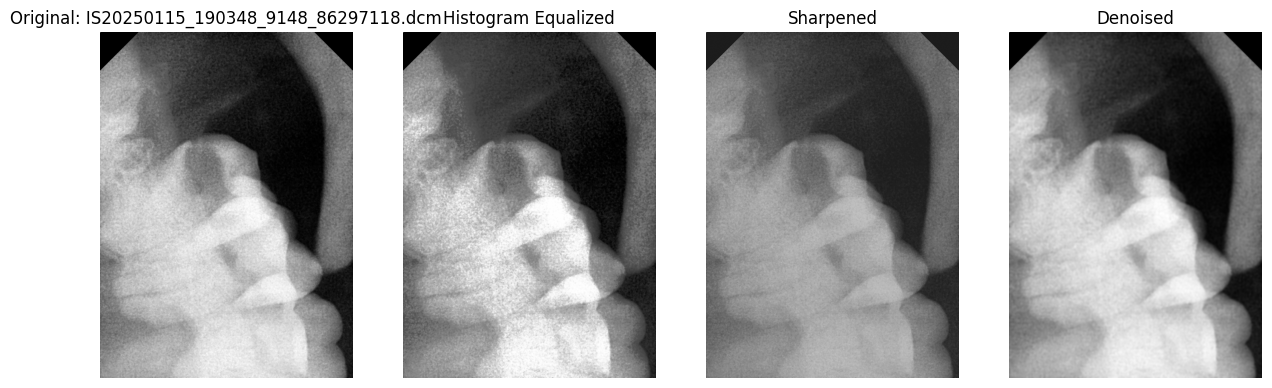

Static preprocessing applied to IS20250115_190348_9148_86297118.dcm. Issues: Fixed parameters may over-enhance or under-denoise.


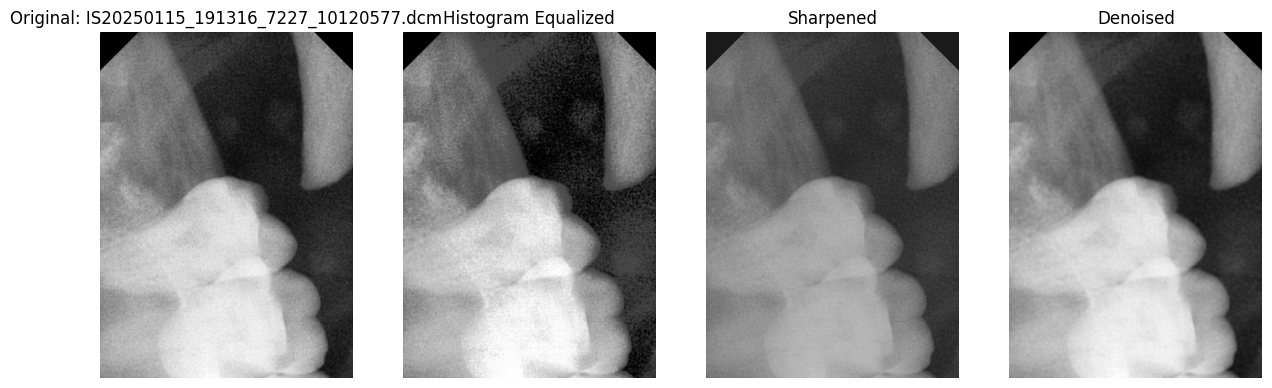

Static preprocessing applied to IS20250115_191316_7227_10120577.dcm. Issues: Fixed parameters may over-enhance or under-denoise.


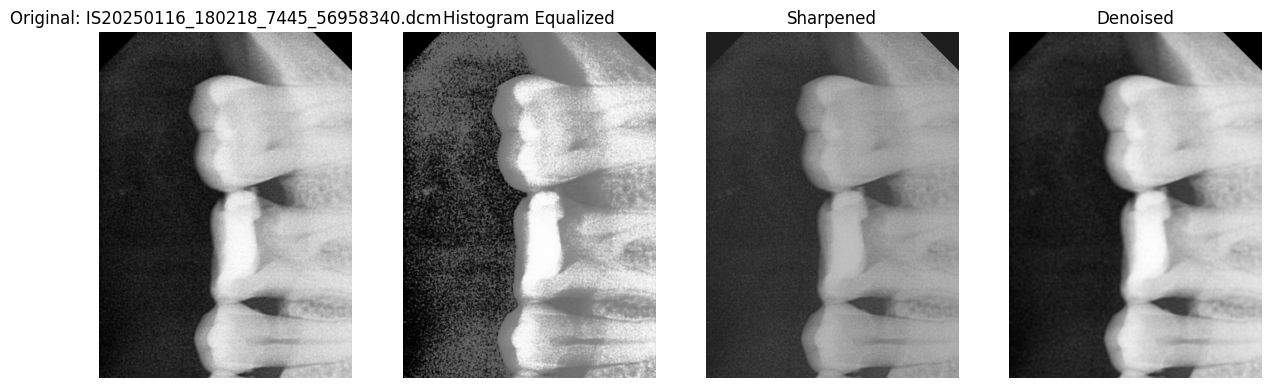

Static preprocessing applied to IS20250116_180218_7445_56958340.dcm. Issues: Fixed parameters may over-enhance or under-denoise.


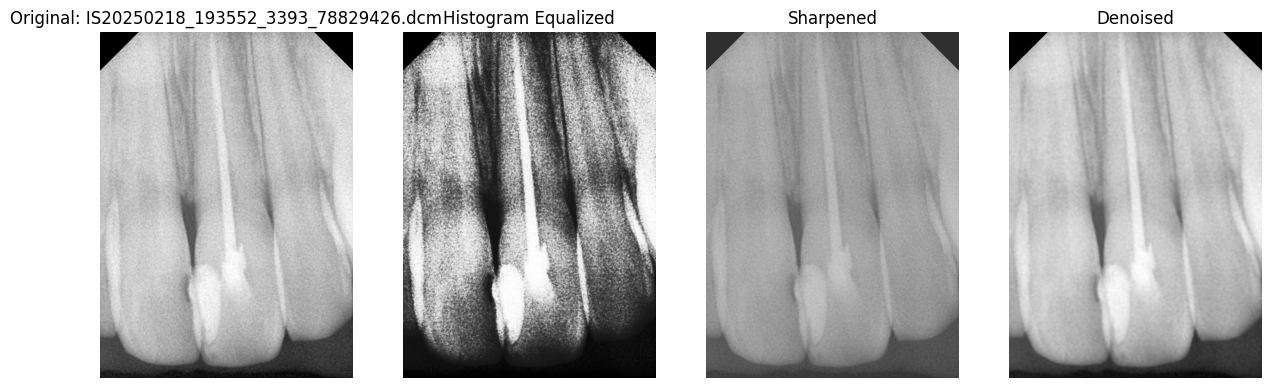

Static preprocessing applied to IS20250218_193552_3393_78829426.dcm. Issues: Fixed parameters may over-enhance or under-denoise.


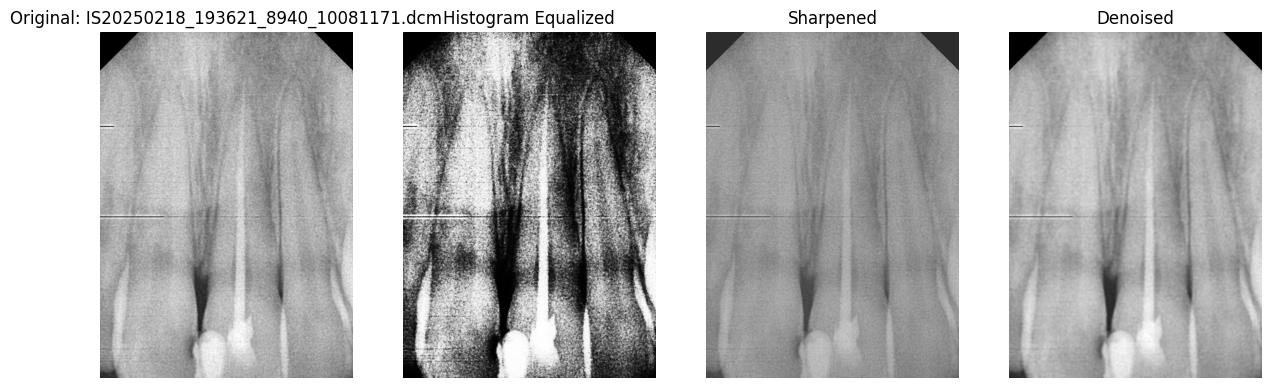

Static preprocessing applied to IS20250218_193621_8940_10081171.dcm. Issues: Fixed parameters may over-enhance or under-denoise.


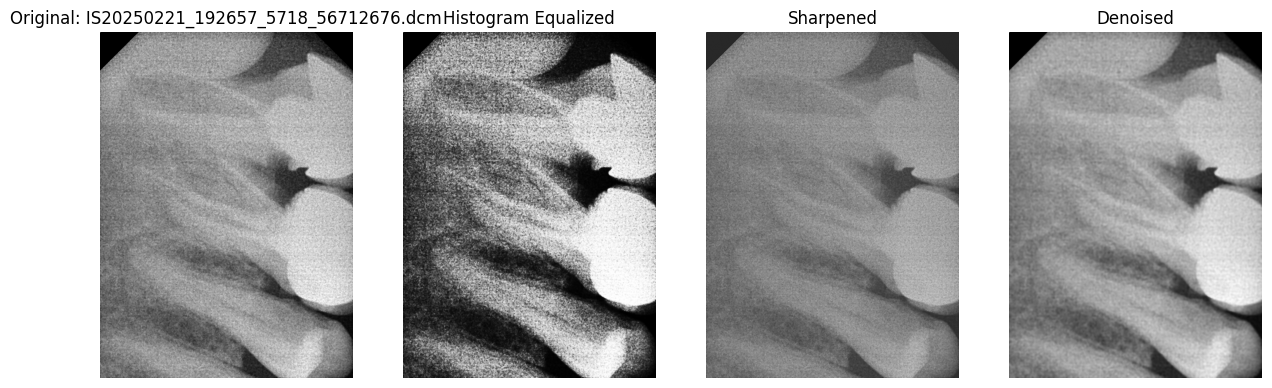

Static preprocessing applied to IS20250221_192657_5718_56712676.dcm. Issues: Fixed parameters may over-enhance or under-denoise.


In [4]:
# Task 3: Static Preprocessing Pipeline
def static_preprocessing(image):
    # Histogram equalization
    image_eq = cv2.equalizeHist((image * 255).astype(np.uint8)).astype(np.float32) / 255
    # Sharpening (unsharp mask)
    gaussian = cv2.GaussianBlur(image, (5, 5), 0)
    sharpened = cv2.addWeighted(image, 1.5, gaussian, -0.5, 0)
    # Denoising (bilateral filter)
    denoised = cv2.bilateralFilter((image * 255).astype(np.uint8), 9, 75, 75).astype(np.float32) / 255
    return image_eq, sharpened, denoised

# Apply static preprocessing and visualize
for i, image in enumerate(images):
    image_eq, sharpened, denoised = static_preprocessing(image)
    # Visualize results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 4, 1)
    plt.title(f"Original: {metadata_list[i]['Filename']}")
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 4, 2)
    plt.title("Histogram Equalized")
    plt.imshow(image_eq, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 4, 3)
    plt.title("Sharpened")
    plt.imshow(sharpened, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 4, 4)
    plt.title("Denoised")
    plt.imshow(denoised, cmap='gray')
    plt.axis('off')
    plt.show()
    print(f"Static preprocessing applied to {metadata_list[i]['Filename']}. Issues: Fixed parameters may over-enhance or under-denoise.")


Metrics for IS20250115_171841_9465_61003253.dcm (Original): {'Brightness': np.float64(0.6869815874294927), 'Contrast': np.float64(0.19278367413150277), 'Sharpness': np.float64(82.741920481094), 'Noise': np.float64(0.10082181410702797), 'Filename': 'IS20250115_171841_9465_61003253.dcm', 'Processing': 'Original', 'PSNR': np.float64(12.306028342506242), 'SSIM': np.float64(0.7197696533276025)}
Metrics for IS20250115_171841_9465_61003253.dcm (Processed): {'Brightness': np.float32(0.4939689), 'Contrast': np.float32(0.2924455), 'Sharpness': np.float64(88.42171741145933), 'Noise': np.float32(0.17848496), 'Filename': 'IS20250115_171841_9465_61003253.dcm', 'Processing': 'Processed (Eq+Sharp+Denoise)', 'PSNR': np.float64(12.306028342506242), 'SSIM': np.float64(0.7197696533276025)}
PSNR: 12.31, SSIM: 0.7198


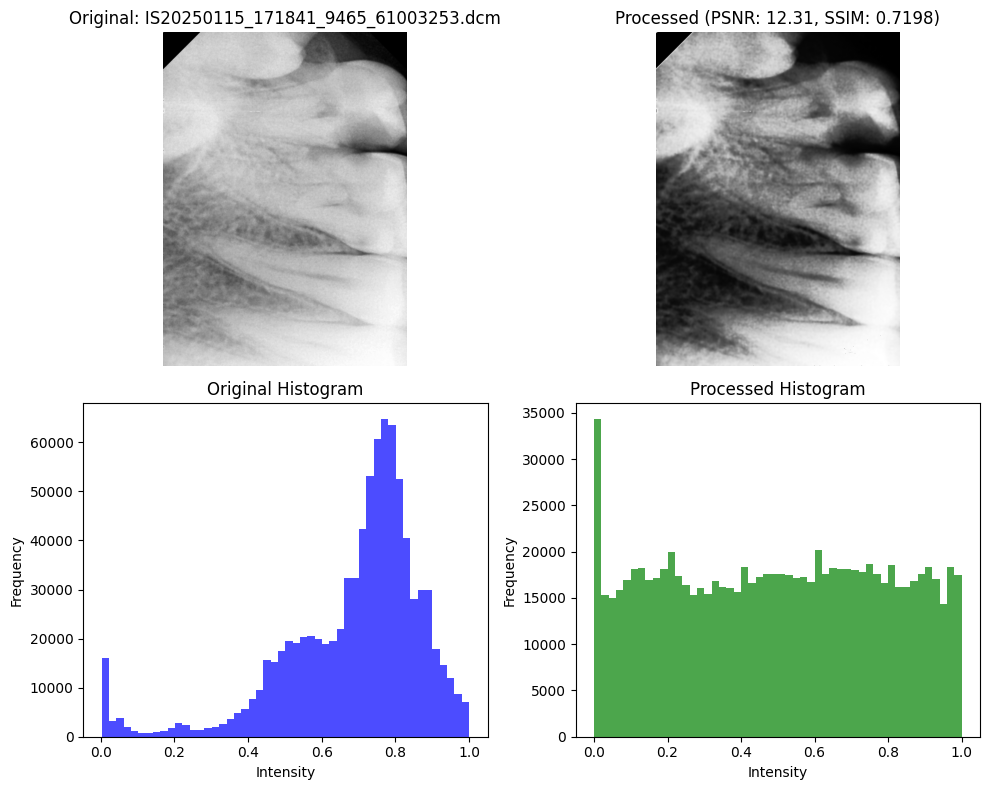

Metrics for IS20250115_190348_9148_86297118.dcm (Original): {'Brightness': np.float64(0.5150665323663712), 'Contrast': np.float64(0.3009119041352232), 'Sharpness': np.float64(116.69788312345442), 'Noise': np.float64(0.3017414469357598), 'Filename': 'IS20250115_190348_9148_86297118.dcm', 'Processing': 'Original', 'PSNR': np.float64(24.08142277250473), 'SSIM': np.float64(0.8015864139754257)}
Metrics for IS20250115_190348_9148_86297118.dcm (Processed): {'Brightness': np.float32(0.49223638), 'Contrast': np.float32(0.29221326), 'Sharpness': np.float64(458.6173476226464), 'Noise': np.float32(0.30398452), 'Filename': 'IS20250115_190348_9148_86297118.dcm', 'Processing': 'Processed (Eq+Sharp+Denoise)', 'PSNR': np.float64(24.08142277250473), 'SSIM': np.float64(0.8015864139754257)}
PSNR: 24.08, SSIM: 0.8016


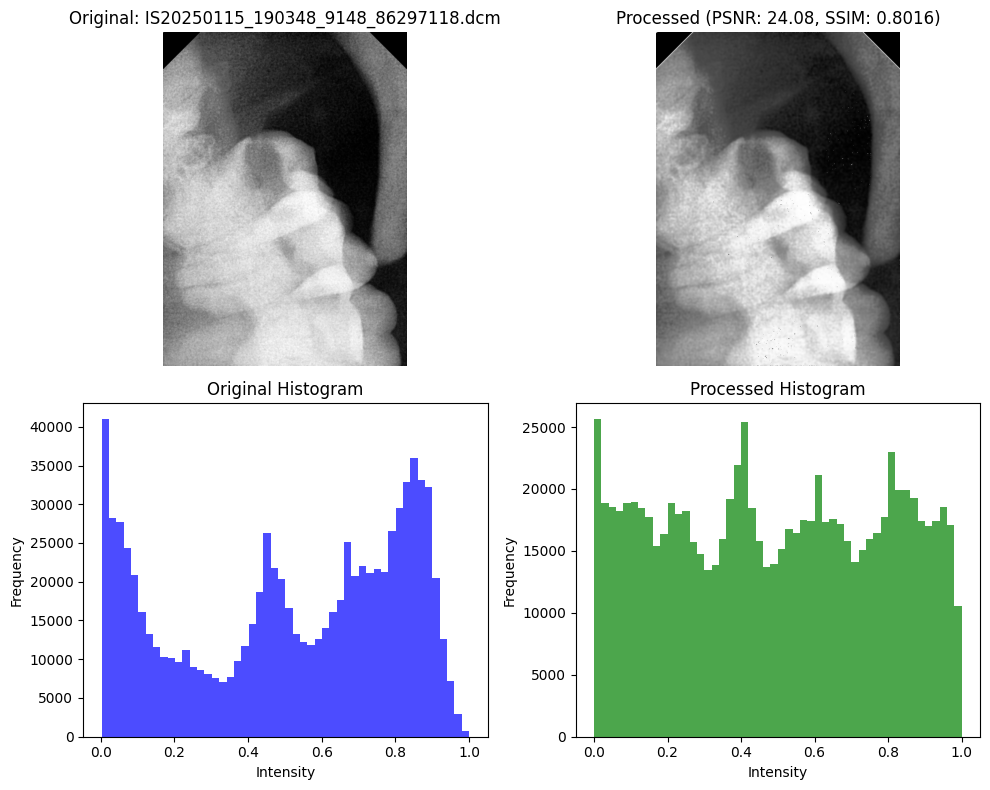

Metrics for IS20250115_191316_7227_10120577.dcm (Original): {'Brightness': np.float64(0.5030450555107887), 'Contrast': np.float64(0.28353279412231364), 'Sharpness': np.float64(101.51437962794768), 'Noise': np.float64(0.303279999753845), 'Filename': 'IS20250115_191316_7227_10120577.dcm', 'Processing': 'Original', 'PSNR': np.float64(24.89377634033653), 'SSIM': np.float64(0.801738744724218)}
Metrics for IS20250115_191316_7227_10120577.dcm (Processed): {'Brightness': np.float32(0.49441284), 'Contrast': np.float32(0.29137272), 'Sharpness': np.float64(1360.913661876523), 'Noise': np.float32(0.31984916), 'Filename': 'IS20250115_191316_7227_10120577.dcm', 'Processing': 'Processed (Eq+Sharp+Denoise)', 'PSNR': np.float64(24.89377634033653), 'SSIM': np.float64(0.801738744724218)}
PSNR: 24.89, SSIM: 0.8017


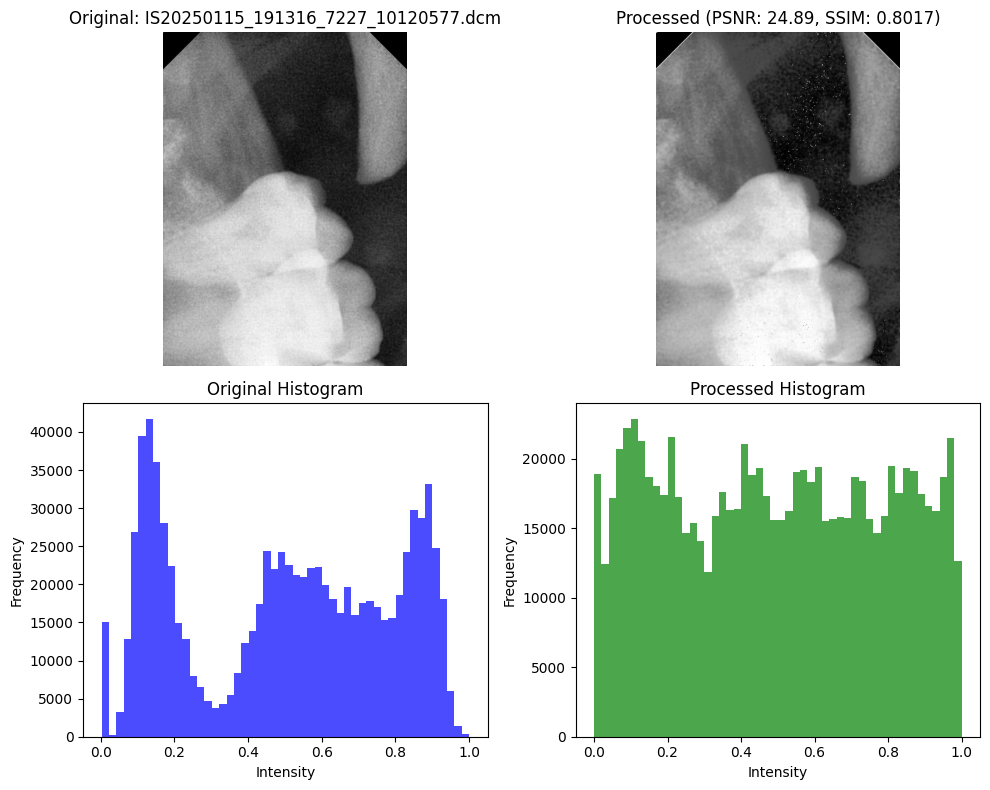

Metrics for IS20250116_180218_7445_56958340.dcm (Original): {'Brightness': np.float64(0.4582496261975109), 'Contrast': np.float64(0.32773139353841446), 'Sharpness': np.float64(89.4367351560174), 'Noise': np.float64(0.33457342796901834), 'Filename': 'IS20250116_180218_7445_56958340.dcm', 'Processing': 'Original', 'PSNR': np.float64(19.506373974782395), 'SSIM': np.float64(0.7427031954640253)}
Metrics for IS20250116_180218_7445_56958340.dcm (Processed): {'Brightness': np.float32(0.49620807), 'Contrast': np.float32(0.28769866), 'Sharpness': np.float64(1114.0078874241517), 'Noise': np.float32(0.30433035), 'Filename': 'IS20250116_180218_7445_56958340.dcm', 'Processing': 'Processed (Eq+Sharp+Denoise)', 'PSNR': np.float64(19.506373974782395), 'SSIM': np.float64(0.7427031954640253)}
PSNR: 19.51, SSIM: 0.7427


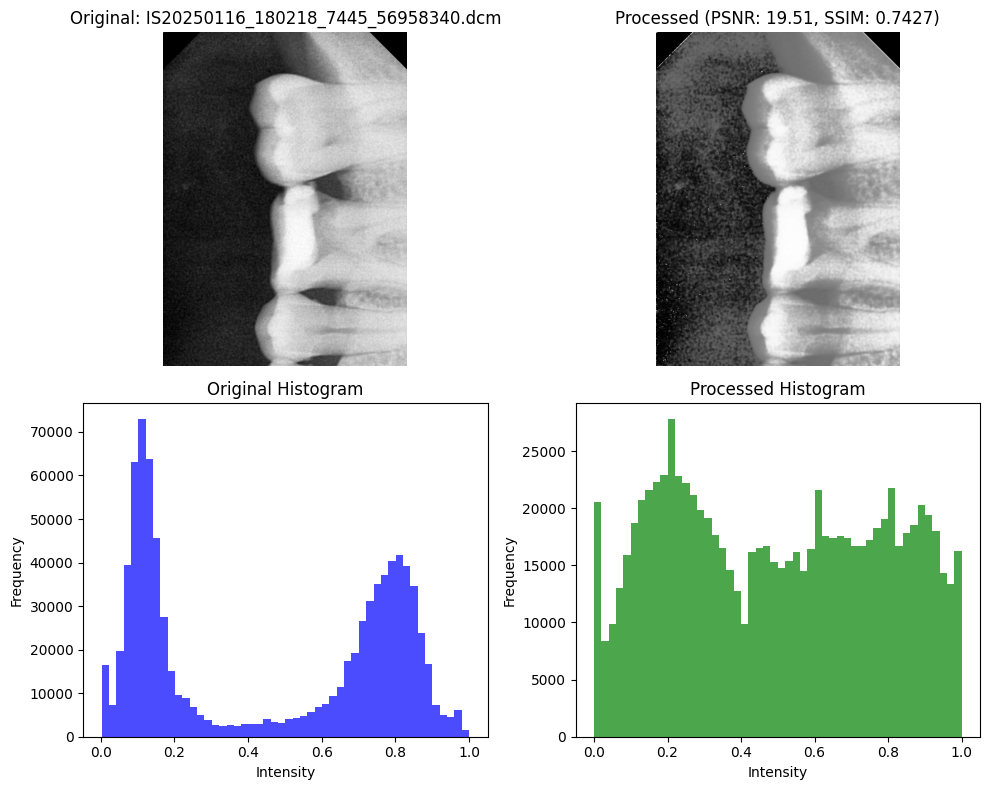

Metrics for IS20250218_193552_3393_78829426.dcm (Original): {'Brightness': np.float64(0.6899376242277732), 'Contrast': np.float64(0.19675875795897296), 'Sharpness': np.float64(175.69812036146033), 'Noise': np.float64(0.114765966615783), 'Filename': 'IS20250218_193552_3393_78829426.dcm', 'Processing': 'Original', 'PSNR': np.float64(11.83132264493189), 'SSIM': np.float64(0.6267960790618314)}
Metrics for IS20250218_193552_3393_78829426.dcm (Processed): {'Brightness': np.float32(0.4957182), 'Contrast': np.float32(0.2859221), 'Sharpness': np.float64(371.72405473087395), 'Noise': np.float32(0.2646822), 'Filename': 'IS20250218_193552_3393_78829426.dcm', 'Processing': 'Processed (Eq+Sharp+Denoise)', 'PSNR': np.float64(11.83132264493189), 'SSIM': np.float64(0.6267960790618314)}
PSNR: 11.83, SSIM: 0.6268


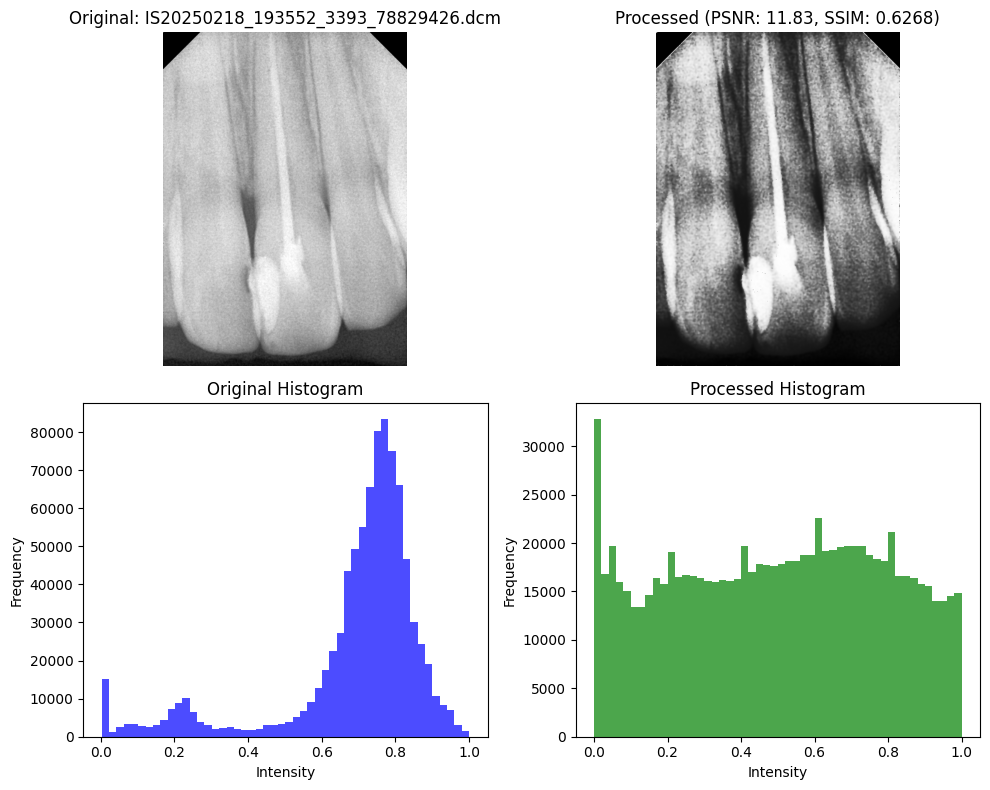

Metrics for IS20250218_193621_8940_10081171.dcm (Original): {'Brightness': np.float64(0.6564579953442565), 'Contrast': np.float64(0.1350118631505305), 'Sharpness': np.float64(236.9231397100756), 'Noise': np.float64(0.11331651450827399), 'Filename': 'IS20250218_193621_8940_10081171.dcm', 'Processing': 'Original', 'PSNR': np.float64(12.164404347355243), 'SSIM': np.float64(0.6166942591068764)}
Metrics for IS20250218_193621_8940_10081171.dcm (Processed): {'Brightness': np.float32(0.49643984), 'Contrast': np.float32(0.27995318), 'Sharpness': np.float64(903.7169190354856), 'Noise': np.float32(0.29244825), 'Filename': 'IS20250218_193621_8940_10081171.dcm', 'Processing': 'Processed (Eq+Sharp+Denoise)', 'PSNR': np.float64(12.164404347355243), 'SSIM': np.float64(0.6166942591068764)}
PSNR: 12.16, SSIM: 0.6167


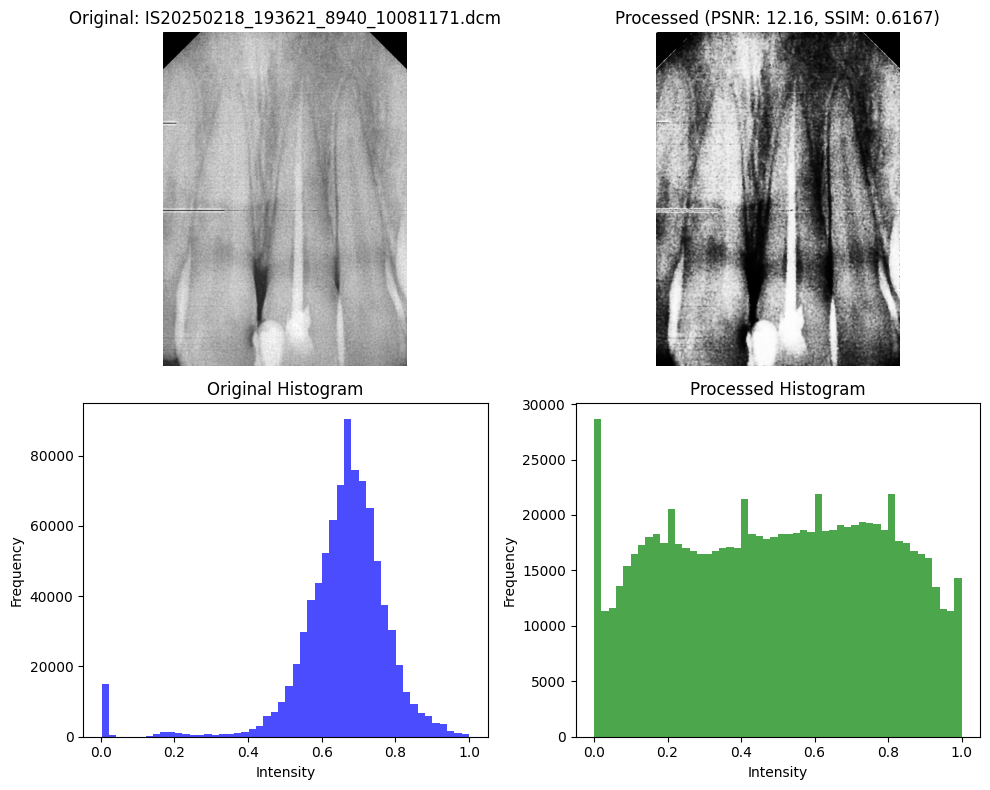

Metrics for IS20250221_192657_5718_56712676.dcm (Original): {'Brightness': np.float64(0.5596067955949504), 'Contrast': np.float64(0.17236239615385207), 'Sharpness': np.float64(373.5171666776705), 'Noise': np.float64(0.12749850306145558), 'Filename': 'IS20250221_192657_5718_56712676.dcm', 'Processing': 'Original', 'PSNR': np.float64(16.174720418094786), 'SSIM': np.float64(0.6682505544911517)}
Metrics for IS20250221_192657_5718_56712676.dcm (Processed): {'Brightness': np.float32(0.49230182), 'Contrast': np.float32(0.28195262), 'Sharpness': np.float64(1401.1649291530146), 'Noise': np.float32(0.24157155), 'Filename': 'IS20250221_192657_5718_56712676.dcm', 'Processing': 'Processed (Eq+Sharp+Denoise)', 'PSNR': np.float64(16.174720418094786), 'SSIM': np.float64(0.6682505544911517)}
PSNR: 16.17, SSIM: 0.6683


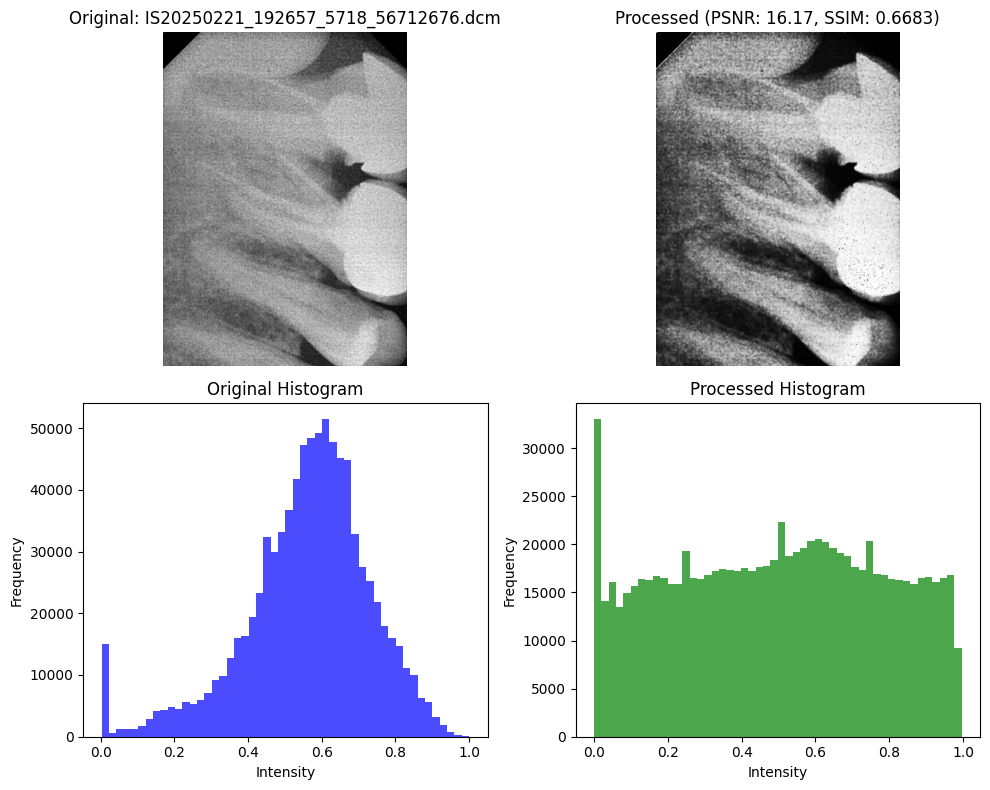

Sequential image metrics saved to sequential_image_metrics(1).csv


Brightness  Contrast    Sharpness     Noise  \
0     0.686982  0.192784    82.741920  0.100822   
1     0.493969  0.292446    88.421717  0.178485   
2     0.515067  0.300912   116.697883  0.301741   
3     0.492236  0.292213   458.617348  0.303985   
4     0.503045  0.283533   101.514380  0.303280   
5     0.494413  0.291373  1360.913662  0.319849   
6     0.458250  0.327731    89.436735  0.334573   
7     0.496208  0.287699  1114.007887  0.304330   
8     0.689938  0.196759   175.698120  0.114766   
9     0.495718  0.285922   371.724055  0.264682   
10    0.656458  0.135012   236.923140  0.113317   
11    0.496440  0.279953   903.716919  0.292448   
12    0.559607  0.172362   373.517167  0.127499   
13    0.492302  0.281953  1401.164929  0.241572   

                               Filename                    Processing  \
0   IS20250115_171841_9465_61003253.dcm                      Original   
1   IS20250115_171841_9465_61003253.dcm  Processed (Eq+Sharp+Denoise)   
2   IS20250115_190348_9148_86297118.dcm                      Original   
3   IS20250115_190348_9148_86297118.dcm  Processed (Eq+Sharp+Denoise)   
4   IS20250115_191316_7227_10120577.dcm                      Original   
5   IS20250115_191316_7227_10120577.dcm  Processed (Eq+Sharp+Denoise)   
6   IS20250116_180218_7445_56958340.dcm                      Original   
7   IS20250116_180218_7445_56958340.dcm  Processed (Eq+Sharp+Denoise)   
8   IS20250218_193552_3393_78829426.dcm                      Original   
9   IS20250218_193552_3393_78829426.dcm  Processed (Eq+Sharp+Denoise)   
10  IS20250218_193621_8940_10081171.dcm                      Original   
11  IS20250218_193621_8940_10081171.dcm  Processed (Eq+Sharp+Denoise)   
12  IS20250221_192657_5718_56712676.dcm                      Original   
13  IS20250221_192657_5718_56712676.dcm  Processed (Eq+Sharp+Denoise)   

         PSNR      SSIM  
0   12.306028  0.719770  
1   12.306028  0.719770  
2   24.081423  0.801586  
3   24.081423  0.801586  
4   24.893776  0.801739  
5   24.893776  0.801739  
6   19.506374  0.742703  
7   19.506374  0.742703  
8   11.831323  0.626796  
9   11.831323  0.626796  
10  12.164404  0.616694  
11  12.164404  0.616694  
12  16.174720  0.668251  
13  16.174720  0.668251

In [5]:
def sequential_preprocessing(image):
    # Step 1: Histogram equalization
    image_eq = cv2.equalizeHist((image * 255).astype(np.uint8)).astype(np.float32) / 255
    # Step 2: Sharpening (unsharp mask) on equalized image
    gaussian = cv2.GaussianBlur(image_eq, (5, 5), 0)
    sharpened = cv2.addWeighted(image_eq, 1.5, gaussian, -0.5, 0)
    # Step 3: Denoising (bilateral filter) on sharpened image
    denoised = cv2.bilateralFilter((sharpened * 255).astype(np.uint8), 9, 75, 75).astype(np.float32) / 255
    return denoised

def sequential_image_processing(images, metadata_list):
    metrics_list = []
    output_csv='sequential_image_metrics(1).csv'
    for i, image in enumerate(images):
        # Compute metrics for original image
        original_metrics = compute_image_metrics(image)
        original_metrics['Filename'] = metadata_list[i]['Filename']
        original_metrics['Processing'] = 'Original'
        
        # Apply sequential preprocessing
        processed_image = sequential_preprocessing(image)
        
        # Compute metrics for processed image
        processed_metrics = compute_image_metrics(processed_image)
        processed_metrics['Filename'] = metadata_list[i]['Filename']
        processed_metrics['Processing'] = 'Processed (Eq+Sharp+Denoise)'
        
        # Compute PSNR and SSIM between original and processed images
        psnr_value = peak_signal_noise_ratio(image, processed_image, data_range=1.0)
        ssim_value = structural_similarity(image, processed_image, data_range=1.0)
        
        # Add PSNR and SSIM to metrics
        original_metrics['PSNR'] = psnr_value
        original_metrics['SSIM'] = ssim_value
        processed_metrics['PSNR'] = psnr_value
        processed_metrics['SSIM'] = ssim_value
        
        # Append metrics
        metrics_list.extend([original_metrics, processed_metrics])
        
        # Print metrics
        print(f"Metrics for {metadata_list[i]['Filename']} (Original): {original_metrics}")
        print(f"Metrics for {metadata_list[i]['Filename']} (Processed): {processed_metrics}")
        print(f"PSNR: {psnr_value:.2f}, SSIM: {ssim_value:.4f}")
        
        # Visualize original and processed images with histograms
        plt.figure(figsize=(10, 8))
        
        plt.subplot(2, 2, 1)
        plt.title(f"Original: {metadata_list[i]['Filename']}")
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        
        plt.subplot(2, 2, 2)
        plt.title(f"Processed (PSNR: {psnr_value:.2f}, SSIM: {ssim_value:.4f})")
        plt.imshow(processed_image, cmap='gray')
        plt.axis('off')
        
        plt.subplot(2, 2, 3)
        plt.hist(image.flatten(), bins=50, color='blue', alpha=0.7)
        plt.title("Original Histogram")
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')
        
        plt.subplot(2, 2, 4)
        plt.hist(processed_image.flatten(), bins=50, color='green', alpha=0.7)
        plt.title("Processed Histogram")
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()
    
    # Save metrics to CSV
    metrics_df = pd.DataFrame(metrics_list)
    metrics_df.to_csv(output_csv, index=False)
    print(f"Sequential image metrics saved to {output_csv}")
    
    return metrics_df

# Call the function
sequential_image_processing(images, metadata_list)